In [2]:
import numpy as np
# 用于线性回归的类。
from sklearn.linear_model import LinearRegression
# 用来切分训练集与测试集
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
# 设置输出精度，默认为 8
np.set_printoptions(precision=2)

In [3]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
X, y = iris.data[:, 2].reshape(-1, 1), iris.data[:, 3]

In [7]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print("权重:", lr.coef_)
print("截距", lr.intercept_)

权重: [0.42]
截距 -0.3705841202176685


In [11]:
y_hat = lr.predict(X_test)

In [12]:
print("实际值:", y_test[:5])
print("预测值:", y_hat[:5])

实际值: [2.4 1.  0.2 1.8 0.2]
预测值: [1.77 1.31 0.22 2.27 0.26]


In [13]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "AR PL UKai CN"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 15

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='orange', label='训练集')
plt.scatter(X_test, y_test, c='g', marker='D', label='测试集')
plt.plot(X, lr.predict(X), "r-")
plt.legend()
plt.xlabel("花瓣长度")
plt.xlabel("花瓣宽度")

Text(0.5, 0, '花瓣宽度')

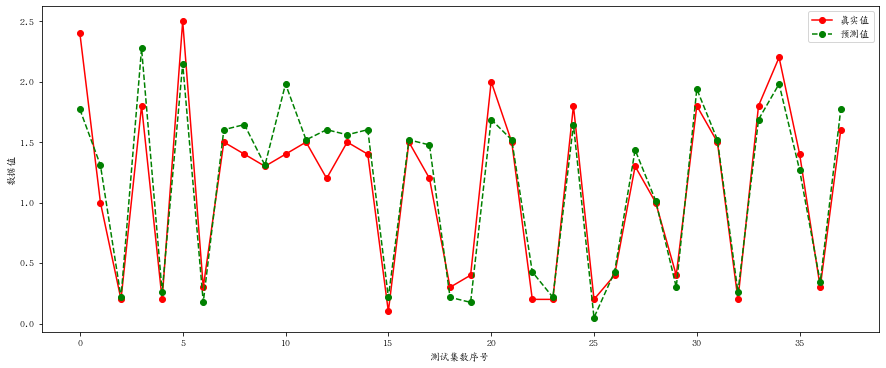

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='真实值', color='r', marker='o')
plt.plot(y_hat, label='预测值', color='g', ls='--', marker='o')
plt.xlabel("测试集数序号")
plt.ylabel("数据值")
plt.legend()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
print("均方误差(MSE):", mean_squared_error(y_test, y_hat))
print("根均方误差(RMSE):", np.sqrt(mean_squared_error(y_test, y_hat)))
print("平均绝对值误差(MAE)", mean_absolute_error(y_test, y_hat))
print("训练集R^2", r2_score(y_train, lr.predict(X_train)))
print("测试集R^2", r2_score(y_test, y_hat))
# score 其实求解的就是r^2的值。但是注意，r2_score 方法与score 方法传递参数的内容是不同的
print("训练集R^2", lr.score(X_train, y_train))
print("测试集R^2", lr.score(X_test, y_test))

均方误差(MSE): 0.0521286207919386
根均方误差(RMSE): 0.2283169305854005
平均绝对值误差(MAE) 0.1673599103556632
训练集R^2 0.9358824215964661
测试集R^2 0.8931453922584154
训练集R^2 0.9358824215964661
测试集R^2 0.8931453922584154


In [18]:
### 多元线性回顾程序.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
X, y = boston.data, boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [66]:
df = pd.DataFrame(np.concatenate([X, y.reshape(-1, 1)], axis=1), 
                  columns=boston.feature_names.tolist() + ['MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


|  特征    |   说明   |
| ---- | ---- |
|  CRIM    |  房屋所在镇的犯罪率。    |
|  ZN  |  房子大于25000平方英寸住宅所占比例 |
|  INDUS    |  房屋所在镇非零售区域所占比例
|  CHAS      |  房屋位于河边，值为1， 否者为 0
|  NOX |   一氧化氮浓度
|  AGE | 1940年前建成房屋所占比例
|  DIS|   房屋距离波士顿五大就业中心的加权距离
|  RAD|   距离房屋最近公路编号。
|  TAX | 财产税额度
|  PIRATIO | 房屋所在镇师生比
|  B  |   计算公式为 1000 * (房屋所在镇非美籍人口所在比例 - 0.63) ** 2.
|  LSTAT  |  弱势群体人口所在比例
|  MEDV  |   房屋的平均价格



In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("模型权重:", lr.coef_)
print("截距:", lr.intercept_)
y_hat = lr.predict(X_test)
print("训练集R^2：", lr.score(X_train, y_train))
print("测试集R^2：", lr.score(X_test, y_test))

模型权重: [-1.18e-01  4.40e-02 -5.77e-03  2.39e+00 -1.56e+01  3.77e+00 -7.04e-03
 -1.43e+00  2.40e-01 -1.13e-02 -9.86e-01  8.44e-03 -4.99e-01]
截距: 36.93325545712031
训练集R^2： 0.7697699488741149
测试集R^2： 0.635463843320211
